In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
bike_data = pd.read_csv("bikeShareDay.csv",delimiter=",")
bike_data.head() # successfully loading data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Observation: 1st impression
- "instant" is a index row, thus depending on the requirement we may just delete it.
- "dteday" is a date attribute but it's currently be classified as a string/object. So we need to decode it into date
- There are 4 float64 for "temp", "atemp", "hum" and "windspeed" respectively. It's because there are already normalized into -1 to 1. What is the effect of these normalized value to the ml moodel?
- The target is "cnt"
    - According to dataset description, "cnt" is the total of "registered" and "casual", which make them to be dependent variables, one of which should be eliminated because it would be redundant to have all of them. On top of that, these three features are perhaps target value for this analysis, either we carry out this research to predict total rents ("cnt") or number of registered users or number of casual users, but cannot be all of them.

In [7]:
# transform "dteday" to date object
# clean out redundant features


In [8]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


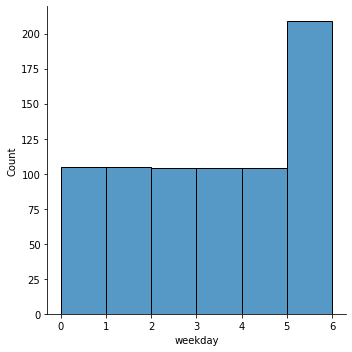

In [16]:
sns.displot(bike_data, x= "weekday",binwidth=1)

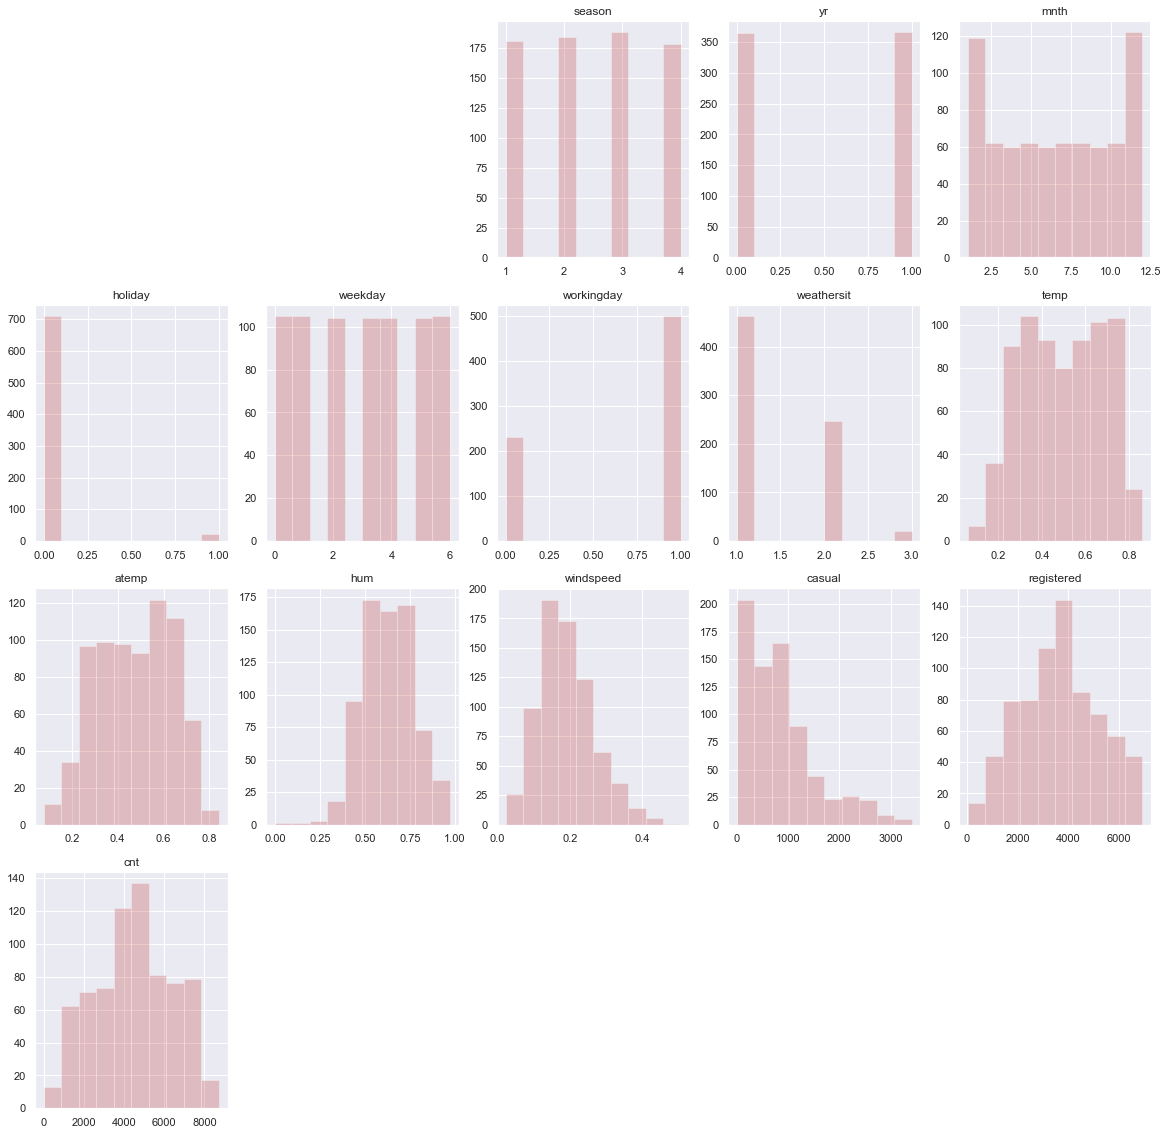

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize= (20,20))
n = len(bike_data.columns)

for i, col in enumerate(bike_data.columns):
    if i < 2:
        continue
    plt.subplot(4,5,i+1)
    plt.hist(bike_data[col], alpha=0.3, color="r")
    plt.title(col)
  


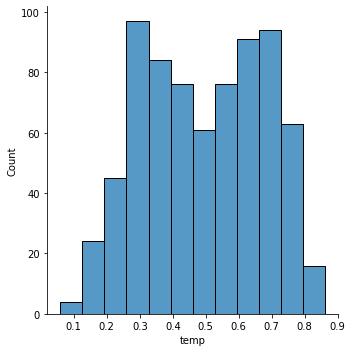

In [18]:
sns.displot(bike_data, x= "temp")

## Observation: historgram
- "season" seems to have a bell shape. Good
- "yr", "mnth" reflecting that data is equally collected for every month in 2011 and 2012.
- "holiday" show that there aren't many records collected in the holiday compared to a normal day.
- "weekday" good
- "workingday" good. there are 2/3 of week is working day and the mean reflecting exactly that.
- "weathersit"
- "temp"
- "atemp"

### Boxplot

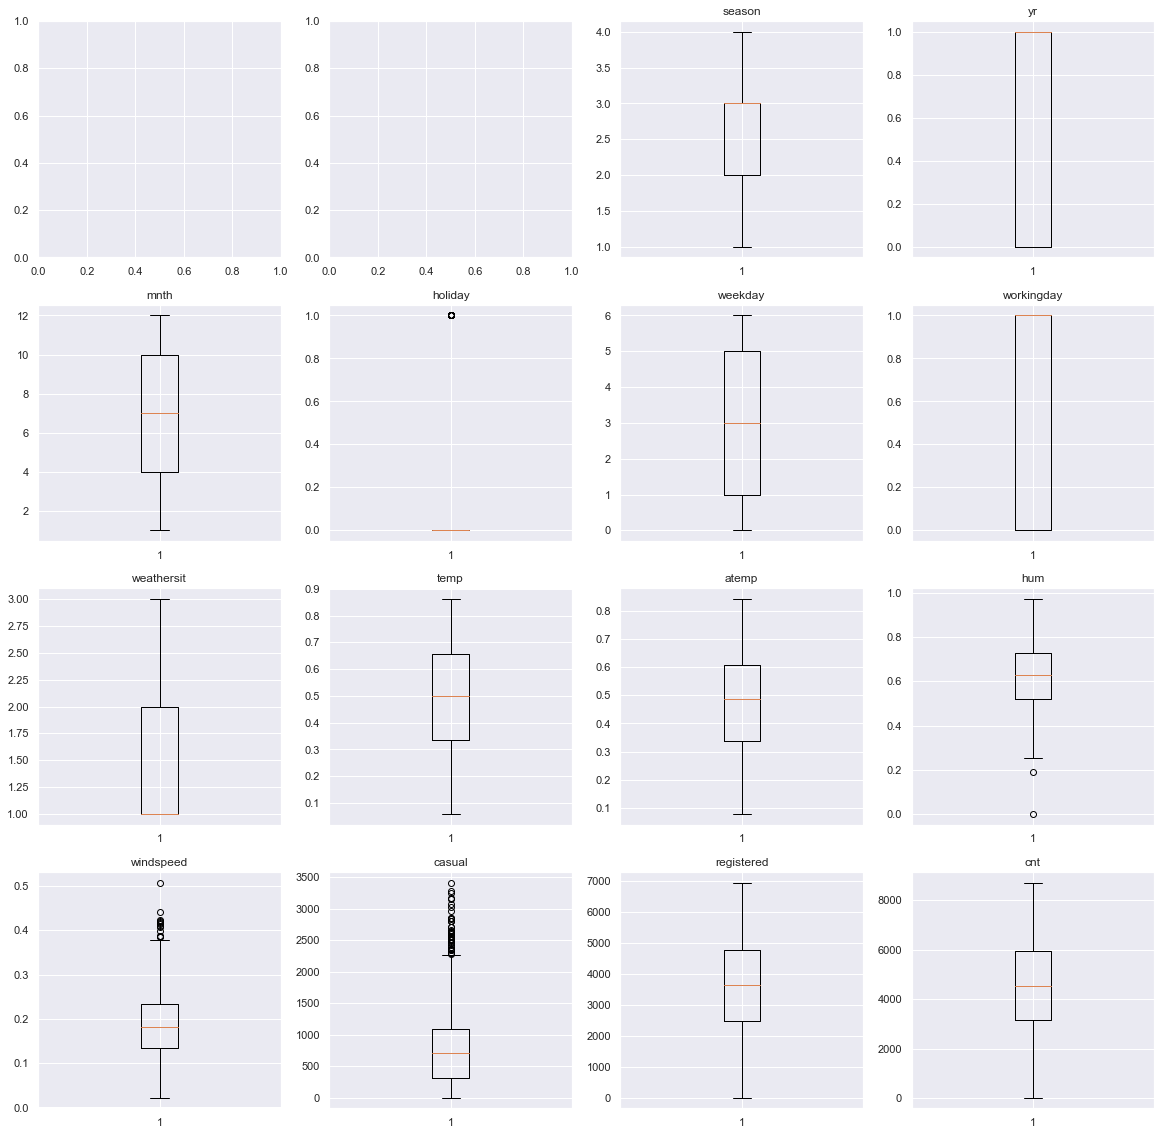

In [63]:
import math
fig, ax = plt.subplots(4,4,figsize=(20,20))

n = len(bike_data.columns)
for i, col in enumerate(bike_data.columns):
    if i < 2:
        continue
    ax_col = ax[math.floor(i / 4), i % 4]
    ax_col.boxplot(bike_data[col])
    ax_col.set_title(col)
    
    

## Observation Boxplot
- "casual" is quite strange, there are days when casual users peaked up to 3500 but on average it's very low, around 750

/var/folders/ks/c7f10mrs12z35r1mm8xqv_zh0000gn/T/ipykernel_9076/502041285.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax)


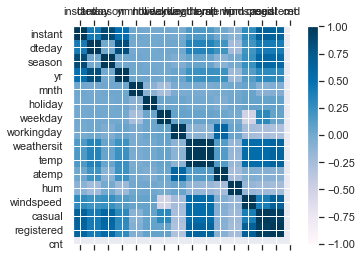

In [66]:
correlations = bike_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(bike_data.columns)
ax.set_yticklabels(bike_data.columns)
plt.show()

### Observation from correlation plot
- for sure "dteday" and "instant" should be removed
- "weathersit" and "temp" is sus